#Performing Maximum Likelihood Estimates (MLEs) in IPython

In this tutorial notebook we'll do the following things:
1. Compute the MLE for a normal distribution.
2. Compute the MLE for an exponential distribution.
3. Fit a normal distribution to asset returns using MLE.

First we need to import some libraries

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats

##Normal Distribution
We'll start by sampling some data from a normal distribution.

In [2]:
TRUE_MEAN = 40
TRUE_STD = 10
X = np.random.normal(TRUE_MEAN, TRUE_STD, 1000)

Now we'll define functions that given our data, will compute the MLE for the $\mu$ and $\sigma$ parameters of the normal distribution.

Recall that

$$\hat\mu = \frac{1}{T}\sum_{t=1}^{T} x_t$$

$$\hat\sigma = \sqrt{\frac{1}{T}\sum_{t=1}^{T}{(x_t - \hat\mu)^2}}$$

In [14]:
def normal_mu_MLE(X):
    # Get the number of observations
    T = len(X)
    # Sum the observations
    s = sum(X)
    return 1.0/T * s

def normal_sigma_MLE(X):
    T = len(X)
    # Get the mu MLE
    mu = normal_mu_MLE(X)
    # Sum the square of the differences
    s = sum( np.power((X - mu), 2) )
    # Compute sigma^2
    sigma_squared = 1.0/T * s
    return math.sqrt(sigma_squared)

Now let's try our functions out on our sample data and see how they compare to the built-in `np.mean` and `np.std`

In [15]:
print "Mean Estimation"
print normal_mu_MLE(X)
print np.mean(X)
print "Standard Deviation Estimation"
print normal_sigma_MLE(X)
print np.std(X)

Mean Estimation
39.7630738218
39.7630738218
Standard Deviation Estimation
9.77089401861
9.77089401861


Now let's estimate both parameters at once with scipy's built in `fit()` function.

In [16]:
mu, std = scipy.stats.norm.fit(X)
print "mu estimate: " + str(mu)
print "std estimate: " + str(std)

mu estimate: 39.7630738218
std estimate: 9.77089401861


Now let's plot the distribution PDF along with the data to see how well it fits. We can do that by accessing the pdf provided in `scipy.stats.norm.pdf`.

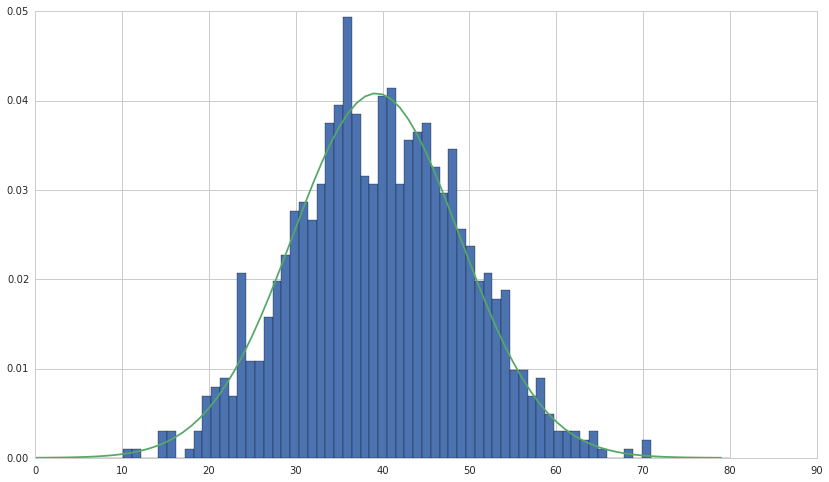

In [17]:
pdf = scipy.stats.norm.pdf
# We would like to plot our data along an x-axis ranging from 0-80 with 80 intervals
# (increments of 1)
x = np.linspace(0, 80, 80)
h = plt.hist(X, bins=x, normed='true')
l = plt.plot(pdf(x, loc=mu, scale=std))

##Exponential Distribution
Let's do the same thing, but for the exponential distribution. We'll start by sampling some data.

In [18]:
TRUE_LAMBDA = 5
X = np.random.exponential(TRUE_LAMBDA, 1000)

`numpy` defines the exponential distribution as
$$\frac{1}{\lambda}e^{-\frac{x}{\lambda}}$$

So we need to invert the MLE from the lecture notes. There it is

$$\hat\lambda = \frac{T}{\sum_{t=1}^{T} x_t}$$

Here it's just the reciprocal, so

$$\hat\lambda = \frac{\sum_{t=1}^{T} x_t}{T}$$

In [19]:
def exp_lamda_MLE(X):
    T = len(X)
    s = sum(X)
    return s/T

In [20]:
print "lambda estimate: " + str(exp_lamda_MLE(X))

lambda estimate: 4.97599277421


In [21]:
# The scipy version of the exponential distribution has a location parameter
# that can skew the distribution. We ignore this by fixing the location
# parameter to 0 with floc=0
_, l = scipy.stats.expon.fit(X, floc=0)

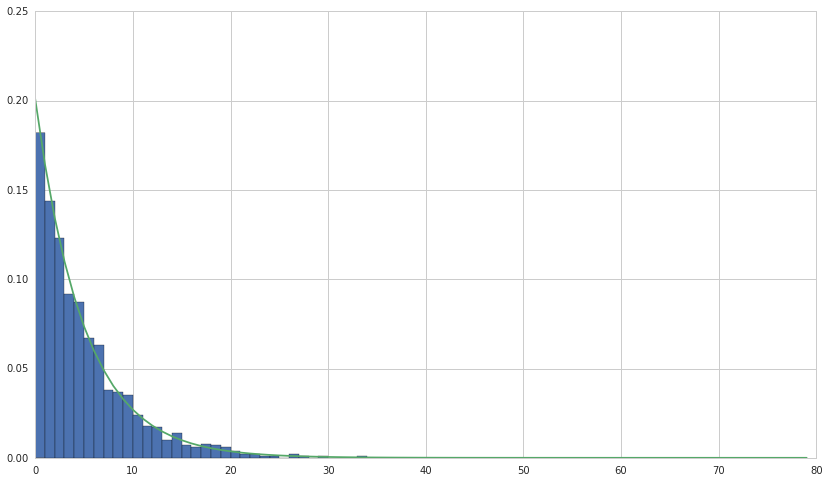

In [22]:
pdf = scipy.stats.expon.pdf
x = range(0, 80)
h = plt.hist(X, bins=x, normed='true')
l = plt.plot(pdf(x, scale=l))

##MLE for Asset Returns

Now we'll fetch some real returns and try to fit a normal distribution to them using MLE.

In [23]:
prices = get_pricing('TSLA', fields='price', start_date='2014-01-01', end_date='2015-01-01')
# This will give us the number of dollars returned each day
absolute_returns = np.diff(prices)
# This will give us the percentage return over the last day's value
# the [:-1] notation gives us all but the last item in the array
# We do this because there are no returns on the final price in the array.
returns = absolute_returns/prices[:-1]

Let's use `scipy`'s fit function to get the $\mu$ and $\sigma$ MLEs.

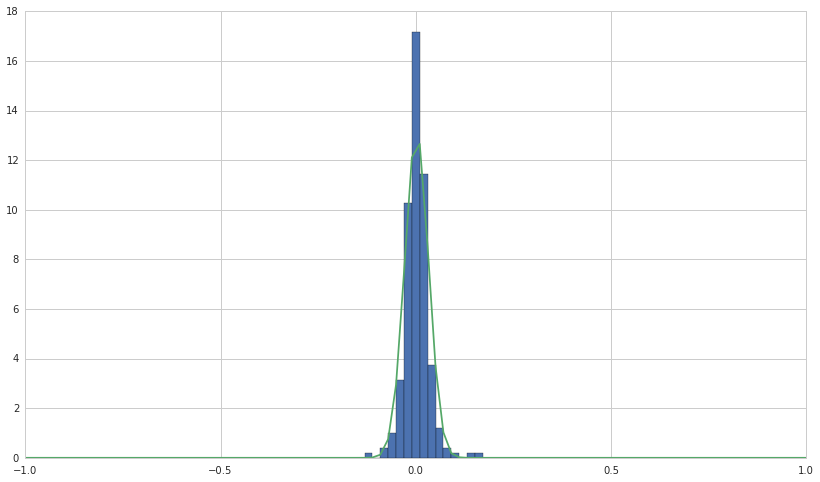

In [24]:
mu, std = scipy.stats.norm.fit(returns)
pdf = scipy.stats.norm.pdf
x = np.linspace(-1,1, num=100)
h = plt.hist(returns, bins=x, normed='true')
l = plt.plot(x, pdf(x, loc=mu, scale=std))